# 차원 축소

많은 경우 머신러닝 문제 중 훈련 샘플이 무수히 많은 특성(feature)을 갖고있는 경우가 존재한다.

이런 많은 특성은 훈련을 느리게 할 뿐만 아니라, 좋은 솔루션을 찾기 어렵게 만든다.

이런 문제를 해결하기 위해 차원 축소를 사용하며, 특성 수를 크게 줄여서 불가능한 문제를 가능한 범위로 변경할 수 있다.

***
**차원을 축소시킬 경우**

1. 일부 정보가 유실된다. <br>
- 훈련 속도가 빨라질 수는 있지만 시스템의 성능이 조금 나빠질 수 있다.

2. 작업 파이프라인이 조금 더 복잡하게 되고 유지 관리가 어려워진다.
***
### 차원의 저주

- 데이터 학습을 위해 차원이 증가하면서 학습데이터 수가 차원의 수보다 적어져 성능이 저하되는 현상

-> 차원이 증가, 혹은 변수가 증가함에 따라 모델의 성능이 나빠지는 현상
- **관측치의 개수 < 변수의 개수일 경우**, 차원이 늘어날수록 빈 공간만 생김.

빈공간의 면적 : 1차원의 점 < 2차원의 점 < 3차원의 점 < 4차원의 점

간단하게 차원을 줄이거나 데이터를 많이 획득하여 해결해야함.

## PCA 시각화하기

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cancer = load_breast_cancer()
scaler = StandardScaler()
x_scaled = scaler.fit_transform(cancer.data)

In [3]:
from sklearn.decomposition import PCA
# 2 개의 주성분만 유지
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x_scaled)

In [4]:
x_pca = pca.transform(x_scaled)
print("원본 데이터 형태 :" , x_scaled.shape)
print("축소된 데이터 형태 : ", x_pca.shape)

원본 데이터 형태 : (569, 30)
축소된 데이터 형태 :  (569, 2)


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


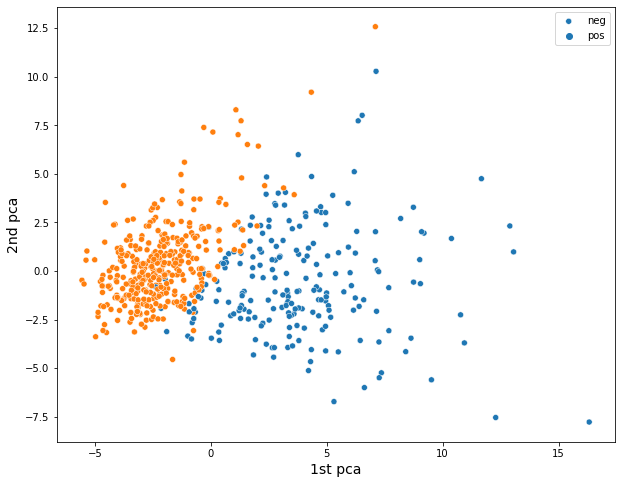

In [5]:
plt.figure(figsize = (10,8))
sns.scatterplot(x_pca[:,0],x_pca[:,1], hue = cancer.target)
plt.legend(['neg','pos'], loc = 'best')
plt.xlabel('1st pca', fontsize = 14)
plt.ylabel('2nd pca', fontsize = 14)
plt.show()

pca는 비지도 학습이므로 단순히 데이터에 있는 상관관계만을 고려한다.

위에 산점도는 첫 번째 주성분과 두 번째 주성분을 사용하여 만들었으며 꽤 구분을 잘했다.

In [6]:
# 중요도에 따른 각행의 주성분 나타내기
print('pca 주성분 :', pca.components_)

pca 주성분 : [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


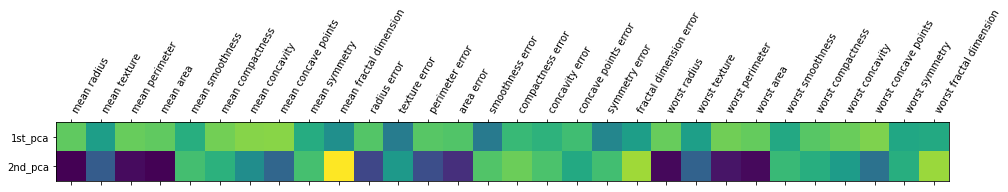

In [7]:
# 히트맵
plt.matshow(pca.components_, cmap = 'viridis')
# y축 설정
plt.yticks([0,1],['1st_pca','2nd_pca'])
# x축 설정, ha = 레이블 텍스트 오른쪽 끝을 눈금에 맞춤
plt.xticks(range(len(cancer.feature_names)),
          cancer.feature_names,rotation = 60, ha = 'left')
plt.show()

## 차원을 감소시키는 두 가지 주요한 접근법

### 1. 투영

- **모든 훈련 샘플은 고차원 안의 저차원 부분 공간에 놓여 있다.**

ex) 3차원의 평면 형태로 데이터가 존재 할 경우 2차 평면 형태로 옮긴다.

그러나 스위스 롤 처럼 데이터셋을 마냥 투영시키는게 답은 아니다.

### 2. 매니폴드 학습

- 2차원 매니폴드는 고차원 공간에서 휘어지거나 뒤틀린 모습이며, **스위스 롤**은 매니폴드 학습의 한가지 예이다.

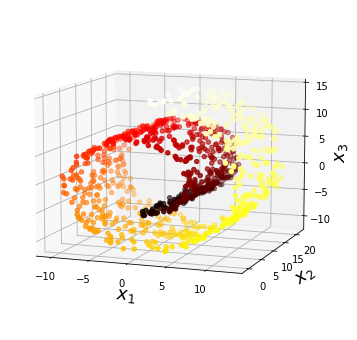

In [25]:
# 스위스롤
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

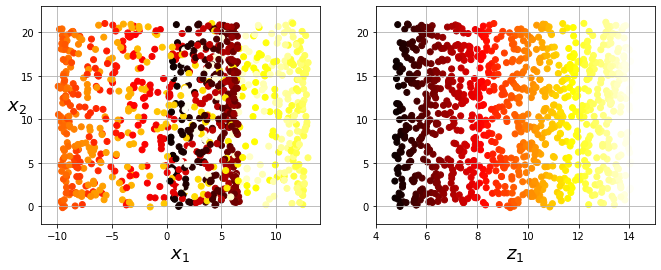

In [24]:
# 투영 이후의 2차원 데이터셋
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

- 일반적으로 d차원 매니폴드는 전체의 어느 한 부분에만 한정되는(국부적으로) d차원 초평면으로 보일 수 있는 n차원 공간의 일부다.


- 대다수의 차원 축소 알고리즘은 매니폴드 학습 방식을 사용하며, 이는 대부분 실제 고차원 데이터 셋이 더 낮은 저차원 매니폴드에 가깝게 놓여 있다는 **"매니폴드 가정(가설)"**에 근거한다.


- "매니폴드 가정(가설)"은 종종 다른 가정과 같이 병행되는데, 바로 처리해야 할 작업(ex. 분류 또는 회귀 문제)이 저차원의 매니폴드 공간에 표현되면 더 간단해질 것이라는 가정이다.


- 그러나 이런 암묵적인 가정이 항상 유효하지는 않다. **모델을 훈련시키기전에 훈련 세트의 차원을 감소시키면, 훈련 속도는 빨라지더라도 항상 더 나은 솔루션을 제공해주지는 않는다.

## 3.주성분 분석(PCA)

- 주성분 분석은 데이터에 가장 가까운 초평면을 정의한 다음, 데이터를 이 평면에 투영시키는 방식이다.

#### 3.1 분산 보존

저차원의 훈련 세트를 투영하기 전에 먼저 올바른 초평면을 선택해야하며, 분산을 최대한 보존되는 축을 선택한다.
***
- 분산이 최대한 보존되는 축을 선택하는 것이 정보가 가장 적게 손실되므로 합리적이다. 즉, 원본 데이터셋과 투영된 것 사이의 평균 제곱 거리를 최소화하는 축을 의미한다.
***

In [32]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

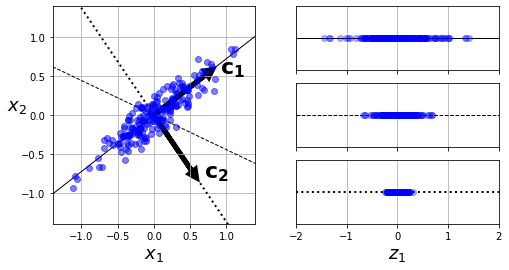

In [33]:
# 각도
angle = np.pi / 5
stretch = 5
m = 200

# 행렬 만들기
np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

# 2d 데이터셋
plt.figure(figsize=(8,4))
plt.subplot2grid((3,2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2)
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

# 실선 2,1축
plt.subplot2grid((3,2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

# 점 -선 2,2축
plt.subplot2grid((3,2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

# 점 --선 2,3축
plt.subplot2grid((3,2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

실선 그래프가 분산을 최대로 유지, 밑의 그래프가 분산을 매우 적게 유지한다.


- PCA는 데이터 셋의 평균이 0이라고 가정하며, PCA를 직접 코드로 구현할 경우 데이터를 원점으로 맞춰주는 작업을 우선시 해야 한다.

## 3-1. 주성분

***
PCA에서는 분산이 최대인 축을 찾는다. -> 첫 번째 축에 직교하고 남은 분산을 최대한 보존하는 두 번째 축을 찾는다. -> 
고차원 데이터 셋이라면 세 번째 축을 찾으며 데이터셋에 있는 차원 수만큼 4번째, 5번째 ... n번째 축을 찾는다

이때, i번째 축을 이 데이터의 i번째 **주성분(PC)**이라고 부른다.

위에 그림에서는 c1이 첫번째 PC이고 c2가 2번째 PC이다.
***

### 특잇값 분해(SVD)
- 훈련 세트의 주성분을 찾을 때 사용한다.

In [36]:
# svd()함수를 사용해 훈련 세트의 모든 주성분을 구한 후 처음 두개의 PC를 정의하는 두 개의 단위 벡터를 추출한다.
X_centered = X - X.mean(axis = 0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:,0]
c2 = Vt.T[:,1]

### d차원으로 투영하기

주성분을 모두 추출해냈다면 처음 d개의 주성분으로 정의한 초평면에 투영하여 데이터셋의 차원을 d차원으로 축소시킬 수 있다.

In [41]:
# 첫 두 개의 주성분으로 정의된 평면에 훈련 세트를 투영한다.
W2 = Vt.T[:,:2]
X2D = X_centered.dot(W2)

X2D

array([[-8.96088137e-01,  2.61576283e-02],
       [-4.53603363e-02, -1.85948860e-01],
       [ 1.38359166e-01, -3.11666166e-02],
       [ 4.16315780e-02, -6.04371773e-02],
       [ 2.18583744e-02, -4.58726693e-02],
       [ 6.53868464e-01,  1.03673047e-01],
       [-4.45218566e-01,  1.63002740e-01],
       [-2.52100754e-02, -3.96098381e-02],
       [ 2.74828447e-01, -1.47486328e-01],
       [-4.89804685e-01, -1.19064333e-01],
       [ 5.91772943e-01, -6.68825324e-03],
       [-7.44460369e-01,  9.37220434e-03],
       [ 5.12230114e-01, -5.91117152e-02],
       [-3.13266691e-01, -2.12641588e-02],
       [ 3.83765553e-01, -1.35145070e-02],
       [-3.77664930e-01,  1.91087392e-01],
       [ 6.22192127e-01, -4.81326634e-02],
       [ 4.05843018e-01, -2.32002753e-01],
       [ 4.62900292e-01, -9.12474313e-02],
       [-5.62638042e-01, -2.36637544e-02],
       [ 8.09046208e-01,  8.31463215e-02],
       [ 1.80719622e-01, -1.69142171e-01],
       [ 2.98447518e-01, -5.11785151e-02],
       [ 4.

### 사이킷런에서 PCA 사용하기

- n_components : 주성분 개수를 지정


- components_ 속성 : 주성분 벡터

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)
X2D

array([[ 122.25544284, -316.23381339],
       [1010.49424063, -289.96490237],
       [ -58.99625891,  393.69420658],
       ...,
       [-271.50691284,  590.07777997],
       [-310.22510862, -116.72485769],
       [1058.86235839,  -83.39151637]])

- explained_variance_ratio_ : 주성분의 설명된 분산의 비율 <br>
즉, 전체 분산에서 차지하는 비율(이 비율이 높을수록 차원 축소 과정에서 정보 손실이 적게 발생)

In [43]:
# 설명된 분산의 비율
pca.explained_variance_ratio_

array([0.95369864, 0.04630136])

#### 2개의 주성분으로 전체 분산의 약 99%를 설명 가능하다.

### 적절한 차원 수 선택하기

- 축소할 차원 수를 임의로 정하기보다는 충분한 분산이 될 때까지 더해야 할 차원 수를 선택하는 것이 간단하다.


In [3]:
# mnist
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)


from sklearn.model_selection import train_test_split
X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
# 784개의 차원 수
X_train.shape

(52500, 784)

In [8]:
# 차원을 축소하지 않고 PCA를 계산한 뒤 훈련세트의 분산을 95%로 유지하는 데 필요한 차원 수를 계산
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [48]:
# 필요한 차원수
d

154

In [51]:
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X_train)

In [60]:
X_reduced

array([[1540.00356811,   31.93937218, -429.97321065, ...,  -84.65004103,
           6.74294682,   20.47482278],
       [-147.85255021,  195.96359846,  -88.79927091, ...,   15.71573594,
         -63.52459544,    7.75944697],
       [ 197.87826738,   73.97047035,  331.97279157, ...,  -23.3617457 ,
          36.31976347,   23.69626902],
       ...,
       [-388.19280532,  758.17127529,  286.00242737, ...,  -13.22716805,
         -17.03272723,  -47.12905142],
       [-392.25807025, -279.30961495,  -76.99133604, ...,   23.26272928,
          88.79718425,   40.25487363],
       [-184.53517546,  499.90421879, -543.43716389, ...,   64.58401628,
         -31.17769535,   52.65581497]])

설명된 분산을 차원 수에 대한 함수로 그려서 설명된 분산의 빠른 성장이 멈추는 변곡점을 확인 할 수도 있다.


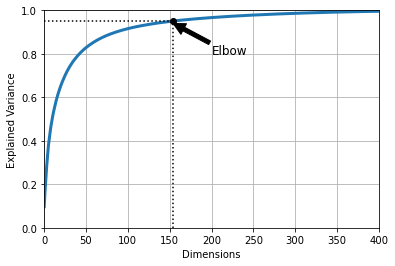

In [25]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.grid(True)
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy = (d,0.94), xytext = (200,0.8),
            fontsize = 12,
            arrowprops = dict(shrink = 2, facecolor = 'black'))
plt.show()

변곡점을 확인하여 차원을 약 100으로 축소해도 설명된 분산을 크게 손해보지 않을 것이다.

### 압축을 위한 PCA

- 차원을 축소하고 난 후에는 훈련의 세트 크기가 줄어든다. (앞서 보았듯이 784개 -> 154개로 줄었다) <br>
 $->$ 분류 알고리즘의 속도를 크게 높일 수 있다.

- 반대로 압축된 데이터셋에 PCA 투영의 변환을 반대로 적용하여 784개의 차원으로 되돌릴 수도 있다.<br>
- 단, 투영에서 5%의 분산을 잃어버렸기 때문에 원본 데이터셋을 얻을 수는 없다.
- inverse_transform()을 사용한다.

In [64]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [67]:
# 784개의 차원 복원
X_recovered.shape

(52500, 784)

In [92]:
# 그래프 그리기
def plot_digits(instances, images_per_row=5, **options):
    size = 28 # 픽셀 수
    images_per_row = min(len(instances), images_per_row) 
    images = [instance.reshape(size,size) for instance in instances] # 784
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = plt.cm.binary, **options)
    plt.axis("off")

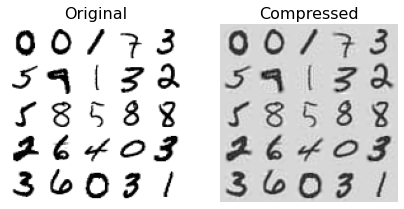

In [94]:
# 원자료와 복구한 자료
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)
plt.show()

### 랜덤 PCA

- 기본값(default 값)이 auto인 svd_solver 매개변수를 randomized로 지정하면, 사이킷런은 랜덤 PCA라는 확률적 알고리즘을 사용한다.


- 랜덤 PCA를 사용하면, 처음 d개의 주성분에 대한 근사값을 빠르게 찾을 수 있다.

In [69]:
rnd_pca = PCA(n_components = 154, svd_solver= 'randomized')
X_reduced = rnd_pca.fit_transform(X_train)

### 커널 PCA(KPCA)

- 커널 기법을 PCA에 적용해서 차원 축소를 위한 복잡한 비선형 투영을 수행할 수도 있다.


- 이 기법은 투영된 후에 샘플의 군집을 유지하거나 꼬인 매니폴드에 가까운 데이터 셋(ex. 스위스 롤)을 펼칠 때도 유용하다.


- 사이킷런의 KernelPCA를 사용하며, kernel 매개변수를 통해 사용할 커널을 지정해 줄 수 있다.



In [98]:
# 스위스롤
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [99]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components = 2, kernel = 'rbf', gamma = 0.04)
X_reduced = rbf_pca.fit_transform(X)

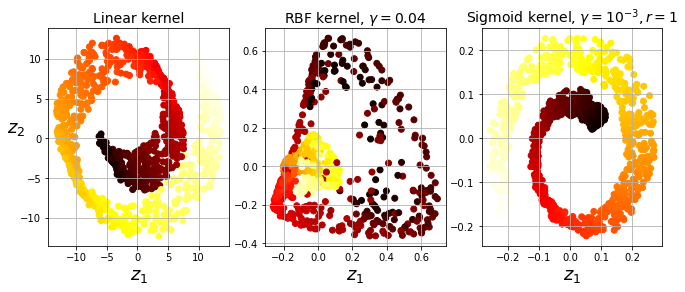

In [100]:
from sklearn.decomposition import KernelPCA

# kernel값 변경
lin_pca = KernelPCA(n_components=2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)


y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

### 커널 선택과 하이퍼파라미터 튜닝

- kpca는 비지도 학습이기 때문에 좋은 커널과 하이퍼파라미터를 선택하기 위한 명확한 성능 측정 기준이 없다.


- 하지만 차원 축소는 종종 지도 학습의 전처리 단계로 활용되므로 그리드 탐색을 사용하여 주어진 문제에서 성능이 가장 좋은 커널과 하이퍼파라미터를 선택할 수 있다.

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# kpca를 사용해 차원 축소후 분류를 위해 로지스틱 회귀 적용
clf = Pipeline([("kpca", KernelPCA(n_components = 2)),
               ("log_reg", LogisticRegression())])

# 가장 좋은 커널과 파라미터 탐색
param_grid = [{"kpca__gamma" : np.linspace(0.03,0.05,10),
              "kpca__kernel" : ['rbf','sigmoid']}]

grid_search = GridSearchCV(clf, param_grid, cv = 3)
grid_search.fit(X,y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [104]:
# 가장 좋은 커널과 하이퍼파라미터
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


In [105]:
# best_params를 기반으로 학습
# 재구성 원상
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [107]:
# 원본 데이터와 복구 데이터 오차 계산
from sklearn.metrics import mean_squared_error
mean_squared_error(X_preimage, X)

9.565397163497625e-27

## LLE : 지역선형 임베딩

- 또 다른 강력한 비선형 차원 축소 기술이며, 투영에 의존하지 않는 매니폴드 학습이다.

***
1. knn을 기반으로 k개의 이웃을 찾는다


2. 찾아낸 이웃들의 분포를 기반으로 cost function을 최소화하는 가중치 w를 찾는다.<br>
-> 원래의 데이터에서 데이터에 가중치를 곱한 값을 뺀 값을 cost value로 두고 이를 줄이는 방향으로 가중치를 조절한다.

3. 1-2 과정을 반복하는 과정에서 차원을 축소한다.
***
***
이 방법은 특히 잡음이 많지 않은 경우 꼬인 매니폴드를 펼치는 데 잘 작동한다.


In [109]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

사이킷런의 LocallyLinearEmbedding 클래스를 사용한다.

n_neighbors : 각 훈련 샘플들의 이웃 k개의 샘플을 찾음.

In [113]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

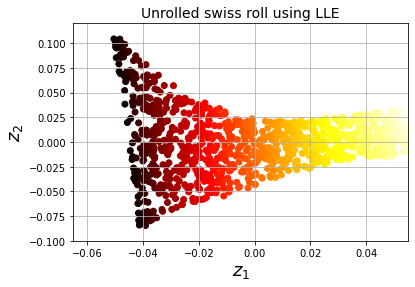

In [114]:
# LLE로 펼친 스위스롤 
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)